In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
imag = cv2.imread('E:/courses/SportsClassifier/model/dataset/Brad Pitt/017_4748675b.jpg')
imag.shape

(589, 474, 3)

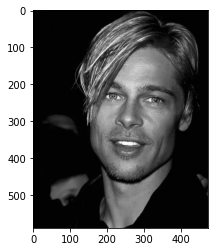

In [13]:
gray = cv2.cvtColor(imag, cv2.COLOR_BGR2GRAY)
gray.shape
plt.imshow(gray, cmap='gray')

In [15]:
face_cascade = cv2.CascadeClassifier('../opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('../opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray)
faces

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


In [62]:
(x,y,w,h) = faces[0]
x,y,w,h

(65, 130, 166, 166)

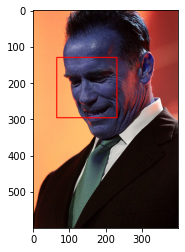

In [63]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

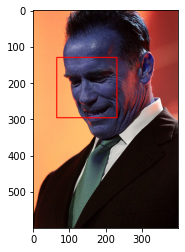

In [118]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

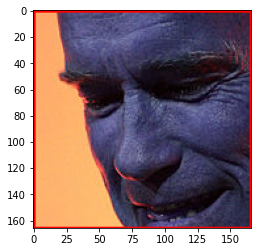

In [65]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [71]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

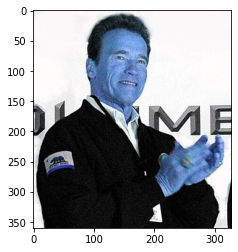

In [72]:
original_image = cv2.imread('./dataset/arnold_schwarzenegger/603px-Arnold_Schwarzenegger_and_Karyn_Marshall.jpg')
plt.imshow(original_image)

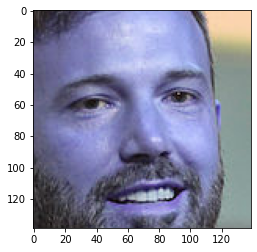

In [74]:
cropped_image = get_cropped_image_if_2_eyes('./dataset/ben_afflek/httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg')
plt.imshow(cropped_image)

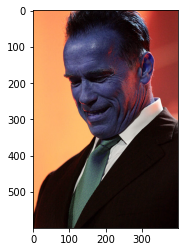

In [75]:
org_image_obstructed = cv2.imread('./dataset/arnold_schwarzenegger/400px-Arnold_Schwarzenegger_(9048849809).jpg')
plt.imshow(org_image_obstructed)

In [107]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [120]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [121]:
img_dirs

['./dataset/Angelina Jolie',
 './dataset/Brad Pitt',
 './dataset/Denzel Washington',
 './dataset/Hugh Jackman',
 './dataset/Jennifer Lawrence',
 './dataset/Johnny Depp',
 './dataset/Kate Winslet',
 './dataset/Leonardo DiCaprio',
 './dataset/Megan Fox',
 './dataset/Natalie Portman',
 './dataset/Nicole Kidman',
 './dataset/Robert Downey Jr',
 './dataset/Sandra Bullock',
 './dataset/Scarlett Johansson',
 './dataset/Tom Cruise',
 './dataset/Tom Hanks',
 './dataset/Will Smith']

In [122]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [123]:
#Generate cropped folder for every actor
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1  

Angelina Jolie
Generating cropped images in folder:  ./dataset/cropped/Angelina Jolie
Brad Pitt
Generating cropped images in folder:  ./dataset/cropped/Brad Pitt
Denzel Washington
Generating cropped images in folder:  ./dataset/cropped/Denzel Washington
Hugh Jackman
Generating cropped images in folder:  ./dataset/cropped/Hugh Jackman
Jennifer Lawrence
Generating cropped images in folder:  ./dataset/cropped/Jennifer Lawrence
Johnny Depp
Generating cropped images in folder:  ./dataset/cropped/Johnny Depp
Kate Winslet
Generating cropped images in folder:  ./dataset/cropped/Kate Winslet
Leonardo DiCaprio
Generating cropped images in folder:  ./dataset/cropped/Leonardo DiCaprio
Megan Fox
Generating cropped images in folder:  ./dataset/cropped/Megan Fox
Natalie Portman
Generating cropped images in folder:  ./dataset/cropped/Natalie Portman
Nicole Kidman
Generating cropped images in folder:  ./dataset/cropped/Nicole Kidman
Robert Downey Jr
Generating cropped images in folder:  ./dataset/cropp

In [124]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

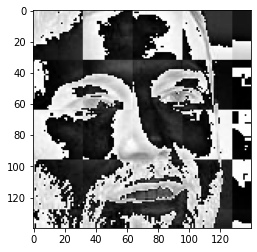

In [125]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap="gray")

In [126]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Angelina Jolie': 0,
 'Brad Pitt': 1,
 'Denzel Washington': 2,
 'Hugh Jackman': 3,
 'Jennifer Lawrence': 4,
 'Johnny Depp': 5,
 'Kate Winslet': 6,
 'Leonardo DiCaprio': 7,
 'Megan Fox': 8,
 'Natalie Portman': 9,
 'Nicole Kidman': 10,
 'Robert Downey Jr': 11,
 'Sandra Bullock': 12,
 'Scarlett Johansson': 13,
 'Tom Cruise': 14,
 'Tom Hanks': 15,
 'Will Smith': 16}

In [127]:
X= []
y= []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scaled_raw_img= cv2.resize(img,(32,32))
        img_har =w2d(img,'db1',5)
        scaled_img_har = cv2.resize(img_har ,(32,32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [128]:
X[0]

array([[249],
       [228],
       [226],
       ...,
       [  3],
       [243],
       [227]], dtype=uint8)

In [129]:
len(X[0])

4096

In [130]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(1376, 4096)

In [131]:
X[0]

array([249., 228., 226., ...,   3., 243., 227.])

In [132]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5726744186046512

In [134]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.58      0.45      0.51        31
           1       0.31      0.45      0.37        11
           2       0.45      0.69      0.55        13
           3       0.57      0.44      0.50        18
           4       0.45      0.77      0.57        22
           5       0.38      0.18      0.24        17
           6       1.00      0.38      0.56        26
           7       0.85      0.63      0.72        27
           8       0.36      0.62      0.46        13
           9       0.57      0.44      0.50        18
          10       0.65      0.65      0.65        23
          11       0.44      0.47      0.45        15
          12       0.79      0.94      0.86        16
          13       0.48      0.71      0.57        38
          14       1.00      0.67      0.80        18
          15       0.75      0.67      0.71        18
          16       0.62      0.50      0.56        20

    accuracy              

In [135]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [136]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.631762,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.300385,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.633713,{'logisticregression__C': 1}


In [137]:
best_estimators['svm'].score(X_test,y_test)

0.627906976744186

In [138]:
best_estimators['random_forest'].score(X_test,y_test)


0.311046511627907

In [139]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6162790697674418

In [140]:
best_clf = best_estimators['svm']

In [141]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[18,  0,  0,  0,  1,  1,  0,  0,  7,  2,  0,  0,  0,  1,  0,  1,
         0],
       [ 0,  5,  0,  0,  2,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  2,
         0],
       [ 0,  0,  8,  1,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         2],
       [ 0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  3,  0,  5,  1,  0,
         1],
       [ 0,  0,  0,  0, 16,  0,  0,  0,  0,  2,  2,  1,  0,  1,  0,  0,
         0],
       [ 3,  0,  1,  1,  1,  6,  0,  1,  1,  0,  0,  1,  0,  0,  0,  1,
         1],
       [ 0,  0,  0,  0,  7,  1, 15,  0,  0,  0,  2,  0,  0,  1,  0,  0,
         0],
       [ 0,  2,  0,  1,  0,  2,  0, 18,  0,  0,  0,  0,  0,  1,  0,  0,
         3],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  1,  0,  0,  0,
         0],
       [ 0,  0,  2,  0,  1,  0,  0,  0,  2, 10,  0,  1,  1,  1,  0,  0,
         0],
       [ 1,  0,  0,  0,  3,  0,  1,  0,  0,  0, 17,  0,  0,  1,  0,  0,
         0],
       [ 1,  4,  0,  0,  1,  1,  0,  1,  1,  0,  0,  6,  0,  0,  

Text(69.0, 0.5, 'Truth')

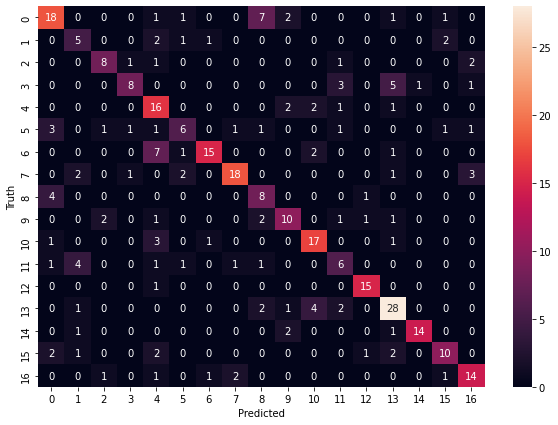

In [142]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [143]:
class_dict


{'Angelina Jolie': 0,
 'Brad Pitt': 1,
 'Denzel Washington': 2,
 'Hugh Jackman': 3,
 'Jennifer Lawrence': 4,
 'Johnny Depp': 5,
 'Kate Winslet': 6,
 'Leonardo DiCaprio': 7,
 'Megan Fox': 8,
 'Natalie Portman': 9,
 'Nicole Kidman': 10,
 'Robert Downey Jr': 11,
 'Sandra Bullock': 12,
 'Scarlett Johansson': 13,
 'Tom Cruise': 14,
 'Tom Hanks': 15,
 'Will Smith': 16}

In [1]:
%pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

Note: you may need to restart the kernel to use updated packages.


NameError: name 'best_clf' is not defined

In [145]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))